In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# load libraries
import PIL.Image as Image
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import cv2
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [3]:
!nvidia-smi # check GUP Description

Mon Dec  5 19:18:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
data_dir = "/kaggle/input/cxr-2-classes/" # data directory path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/kaggle/input/cxr-2-classes')

In [5]:
# assign variables insted of directory path
Covid = list(data_dir.glob("Covid-19/*"))
Normal = list(data_dir.glob("Normal/*"))

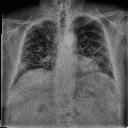

In [6]:
Image.open(str(Covid[15])) # image of covid chest

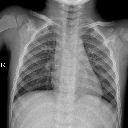

In [7]:
Image.open(str(Normal[15])) # image of normal chest

In [8]:
list(data_dir.glob('*/*.png'))[:10]

[PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_122.png'),
 PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_523.png'),
 PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_209.png'),
 PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_461.png'),
 PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_841.png'),
 PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_781.png'),
 PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_303.png'),
 PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_577.png'),
 PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_629.png'),
 PosixPath('/kaggle/input/cxr-2-classes/Normal/Normal_426.png')]

In [9]:
total = len(Normal) + len(Covid) # total number of images
print(f"Total No. of images: {total}")

Total No. of images: 1675


In [10]:
# calculate the data with respect to target values
dict_Chest_Xray_count = {
    'Normal': len(Normal),
    'Covid' : len(Covid)
}

[50.74626866 49.25373134]


[Text(0.5, 0, 'Classes'),
 Text(0, 0.5, 'Dataset_count(in %age)'),
 Text(0.5, 1.0, 'Distribution of data')]

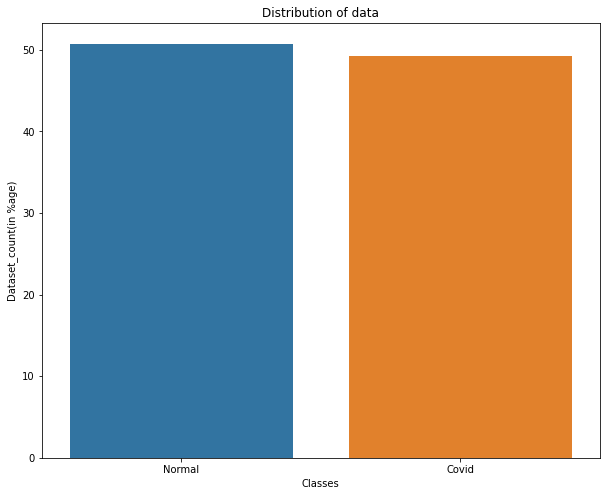

In [11]:
# check data balanced or imbalanced
plt.figure(figsize = (10,8))
value = np.array(list(dict_Chest_Xray_count.values()))
key = np.array(list(dict_Chest_Xray_count.keys()))

value = value/total*100
print(value)
sns.barplot(key , value).set(xlabel = "Classes", ylabel = "Dataset_count(in %age)", title ='Distribution of data')
# here we conclude data is balanced 

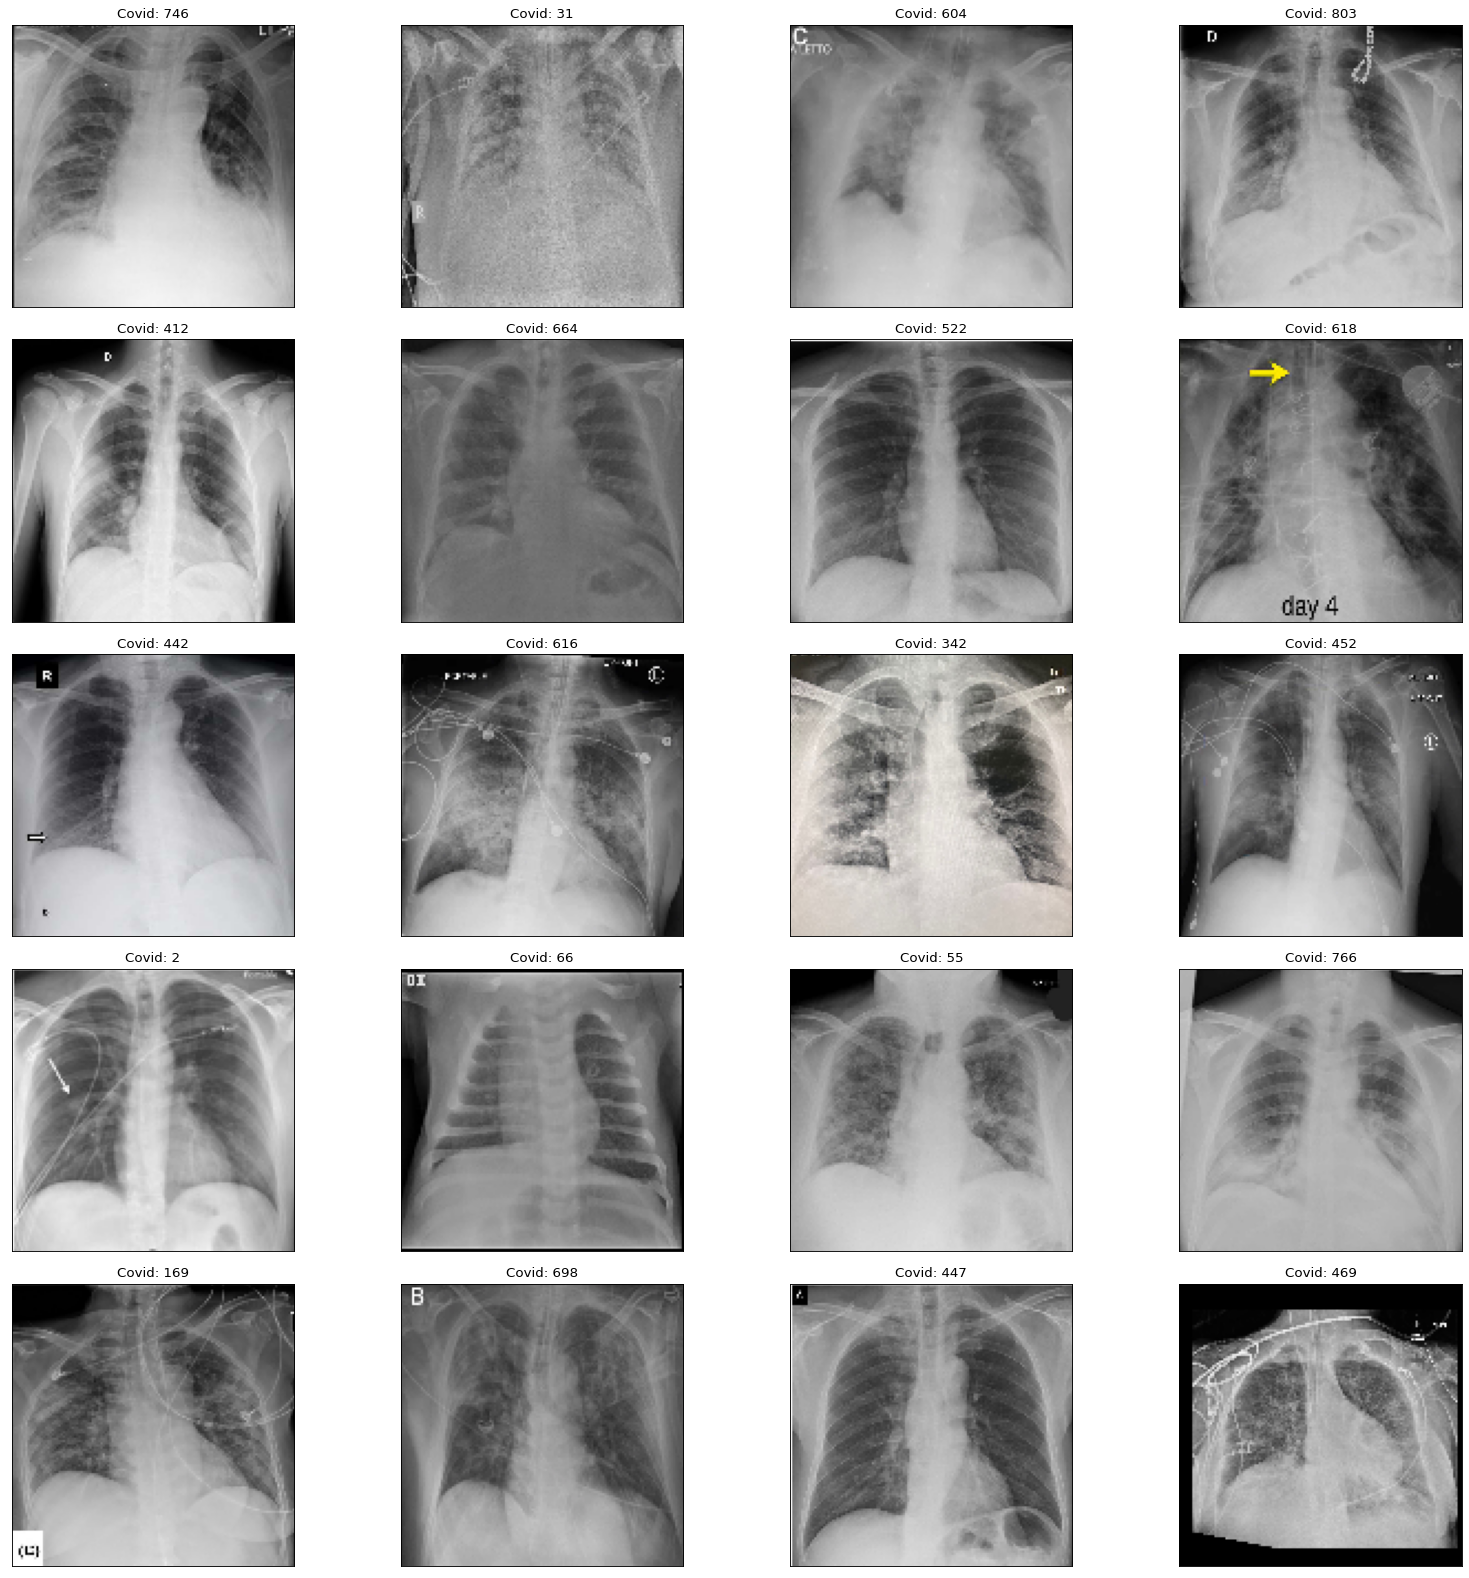

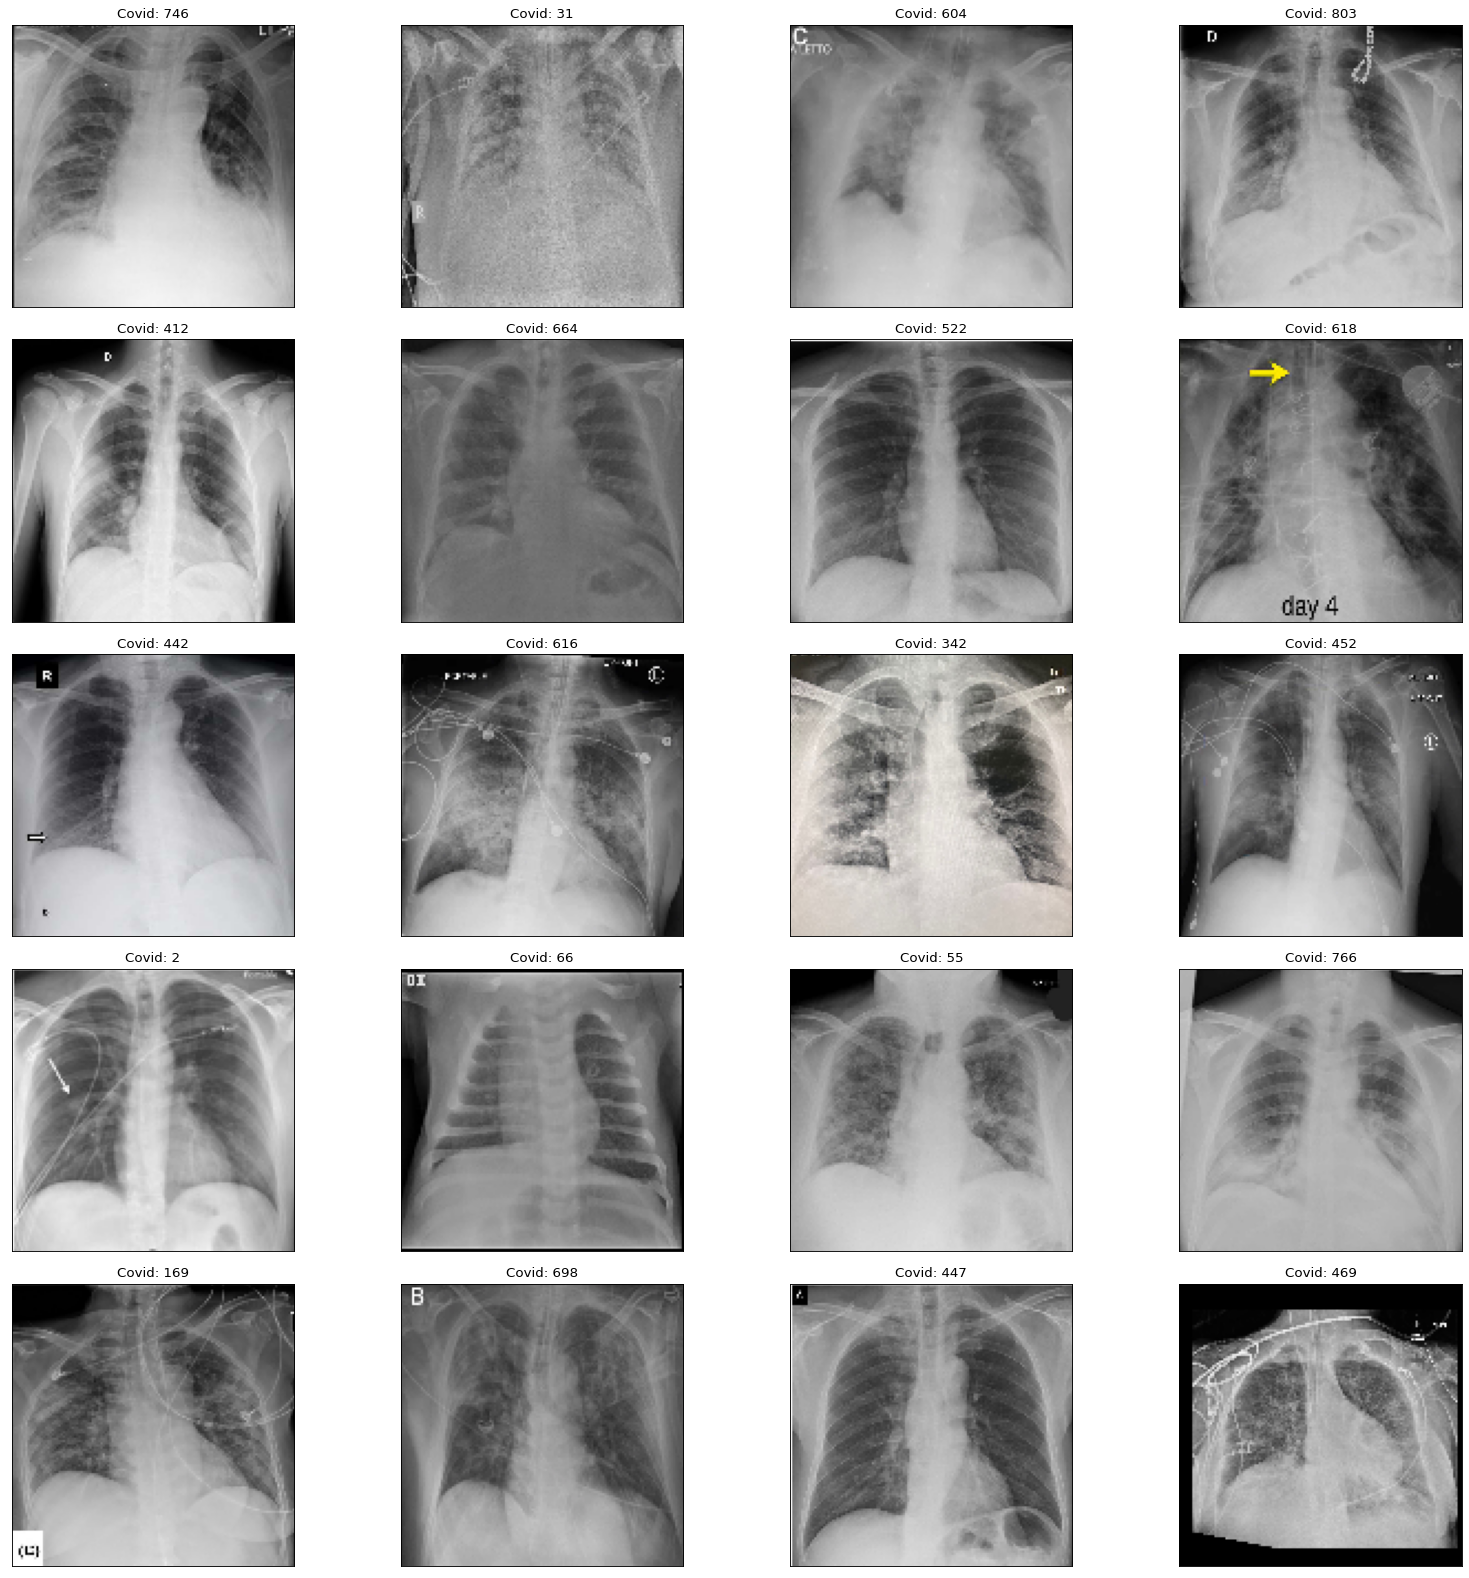

In [13]:
import random
# random 40 images of covid-19 chest X-ray form dataset
fig = plt.figure(figsize=(20, 20), dpi=80)
plt.title("Covid images with Index Number")
for i in range(20):
    random_num = random.randint(0, 825)
    plt.subplot(5,4,i+1)
    plt.tight_layout()
    n = random.randint(0,824)
    img_covid = Image.open(str(Covid[n]))
    plt.imshow(img_covid)
    plt.title(f"Covid: {n}" )
    plt.xticks([])
    plt.yticks([])
fig

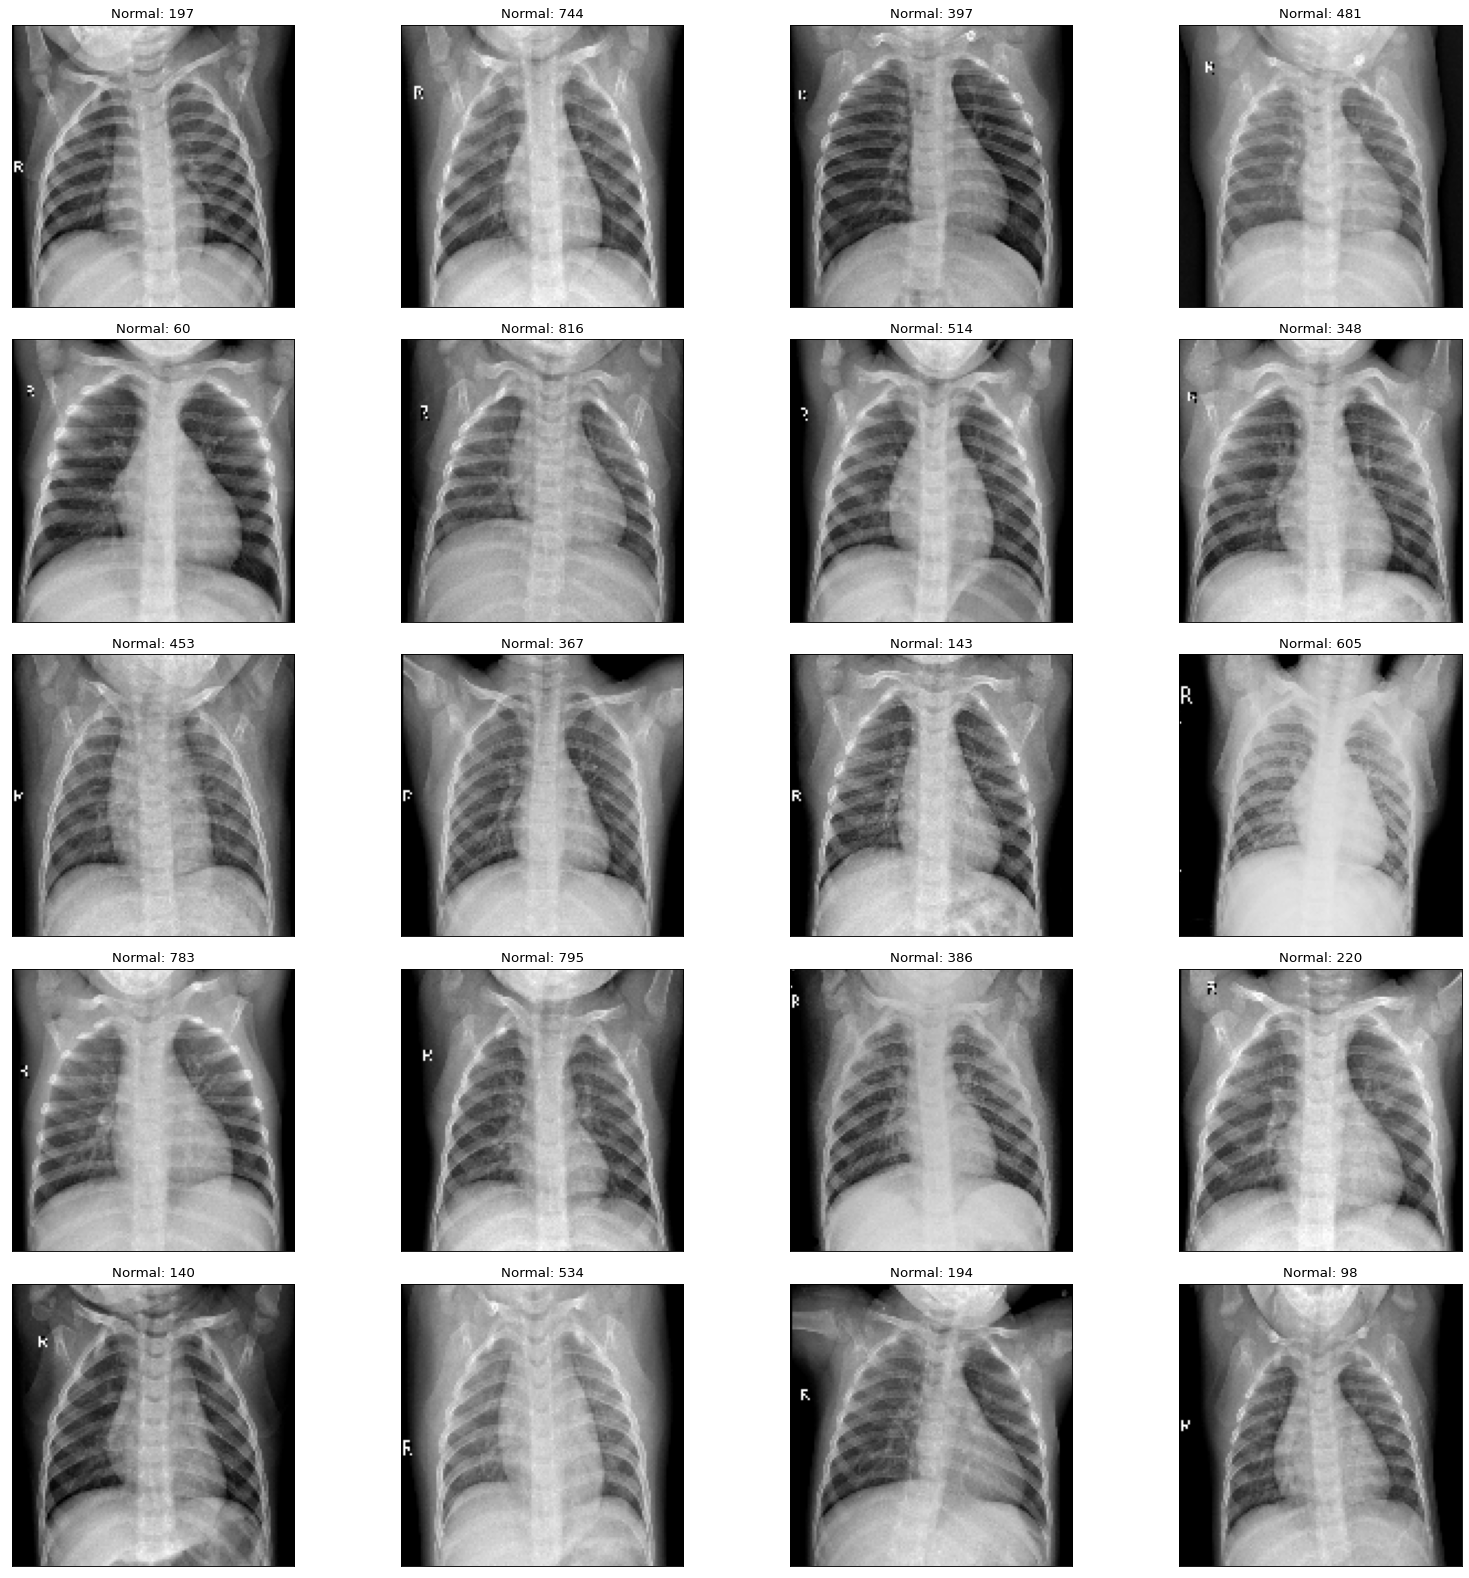

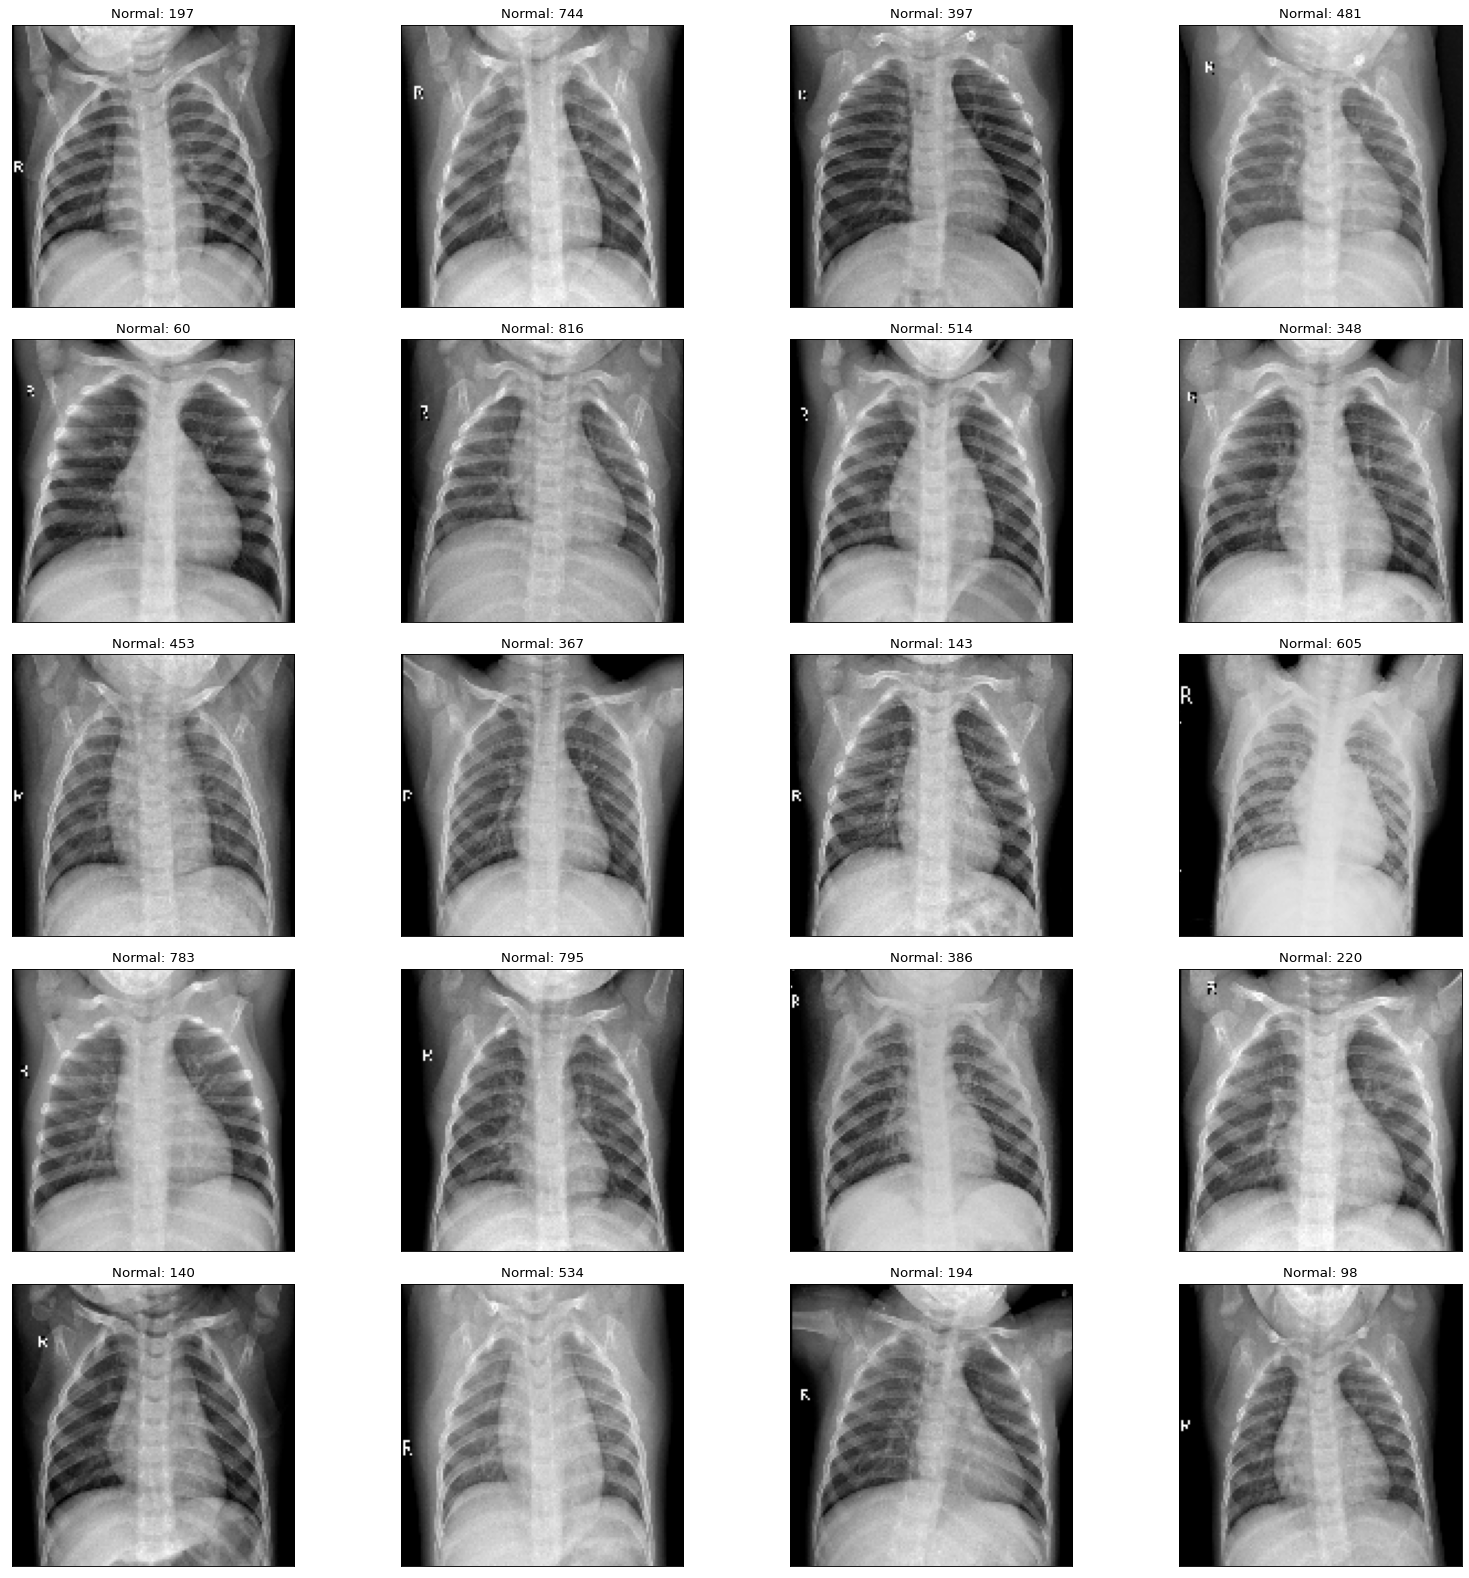

In [14]:
# random 40 images of normal chest X-ray form dataset
fig = plt.figure(figsize=(20, 20), dpi=80)
plt.title("Normal images with Index Number")
for i in range(20):
    random_num = random.randint(0, 825)
    plt.subplot(5,4,i+1)
    plt.tight_layout()
    n = random.randint(0,824)
    img_covid = Image.open(str(Normal[n]))
    plt.imshow(img_covid)
    plt.title(f"Normal: {n}" )
    plt.xticks([])
    plt.yticks([])
fig

In [15]:
data_folder = "/kaggle/input/cxr-2-classes"
imgs = []
lbls = []
for folder in os.listdir(data_folder):
    for file in os.listdir(os.path.join(data_folder, folder)):
        imgs.append(folder)
        lbls.append(os.path.join(data_folder, folder, file))

In [16]:
# saved file the path of images with respect to the labels in dataframe 
data_dict = {'File_path' : lbls, 'Target_value' : imgs}
train_data = pd.DataFrame(data_dict)
train_data.sample(10)

File_path Target_value
1106  /kaggle/input/cxr-2-classes/Covid-19/Covid_513...     Covid-19
1153  /kaggle/input/cxr-2-classes/Covid-19/Covid_445...     Covid-19
420   /kaggle/input/cxr-2-classes/Normal/Normal_226.png       Normal
1299  /kaggle/input/cxr-2-classes/Covid-19/Covid_533...     Covid-19
949   /kaggle/input/cxr-2-classes/Covid-19/Covid_683...     Covid-19
1632  /kaggle/input/cxr-2-classes/Covid-19/Covid_199...     Covid-19
270   /kaggle/input/cxr-2-classes/Normal/Normal_268.png       Normal
1088  /kaggle/input/cxr-2-classes/Covid-19/Covid_418...     Covid-19
932   /kaggle/input/cxr-2-classes/Covid-19/Covid_462...     Covid-19
146   /kaggle/input/cxr-2-classes/Normal/Normal_726.png       Normal

In [17]:
train_data['Target_value'].value_counts() # distribution count of the data 

Normal      850
Covid-19    825
Name: Target_value, dtype: int64

In [18]:
labelArr = train_data['Target_value'].unique()

label_to_id = {}
id_to_label = {}

index = 0

for class_name in labelArr:
    label_to_id[class_name] = str(index)
    id_to_label[str(index)] = class_name
    index = index + 1
print(label_to_id)
print(id_to_label)

{'Normal': '0', 'Covid-19': '1'}
{'0': 'Normal', '1': 'Covid-19'}


In [19]:
# split the data into train and test
from sklearn.model_selection import train_test_split

# train_data_sample = train_data.sample(frac = 1)
train, valid = train_test_split(train_data, stratify = train_data['Target_value'], test_size = 0.2, random_state=42, shuffle=True)

print(len(train))
print(len(valid))

1340
335


In [20]:
train['Target_value'].value_counts()

Normal      680
Covid-19    660
Name: Target_value, dtype: int64

In [21]:
train.head() # training samples

File_path Target_value
229   /kaggle/input/cxr-2-classes/Normal/Normal_175.png       Normal
310   /kaggle/input/cxr-2-classes/Normal/Normal_813.png       Normal
1234  /kaggle/input/cxr-2-classes/Covid-19/Covid_178...     Covid-19
855   /kaggle/input/cxr-2-classes/Covid-19/Covid_409...     Covid-19
1273  /kaggle/input/cxr-2-classes/Covid-19/Covid_89.png     Covid-19

In [22]:
# custom dataset
class CovidDataset(torch.utils.data.Dataset):
    
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, index):
        if torch.is_tensor(index):
            idx = idx.tolist()
            
        img_name = os.path.join(self.root_dir,
                               self.dataframe.iloc[index, 0])
        
        label = torch.tensor(1) if self.dataframe.iloc[index, 1] == 'Covid-19' else torch.tensor(0)
        
        get_image = cv2.imread(img_name)
        image = Image.fromarray(get_image)
            
        if self.transform:
            image = self.transform(image)
            
        return image, label

In [23]:
# apply transforms
transformer_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  # change pixel images to 0-255 t0 0-1 and change the datatype numpy to tensor 
])

transformer_test = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  #change pixel images to 0-255 t0 0-1 and change the datatype numpy to tensor 
])

In [24]:
root_dir = '/kaggle/input/cxr-2-classes'
train_dataset = CovidDataset(train, root_dir = root_dir, transform = transformer_train)
test_dataset = CovidDataset(valid, root_dir = root_dir, transform = transformer_test)

In [25]:
len(test_dataset) # size of train dataset

335

In [26]:
# load data into data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 128)

In [27]:
train_features, train_labels = next(iter(train_loader))
print(f"Features batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Features batch shape: torch.Size([128, 3, 128, 128])
Labels batch shape: torch.Size([128])


In [28]:
for data in train_loader:
    # print(data)
    break

In [29]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self,num_classes=2):
        super(ConvNet,self).__init__()
        #Input shape= (128,3,128,128)
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 12, kernel_size = 5, stride = 1, padding = 2)
        #Shape= (128,12,128,128)
        self.bn1 = nn.BatchNorm2d(num_features = 12)
        self.relu1 = nn.LeakyReLU()
        #Shape= (128,12,128,128)
        
        self.pool1 = nn.MaxPool2d(kernel_size = 2)
        #Reduce the image size be factor 2
        #Shape= (128,16,64,64)

        self.conv2 = nn.Conv2d(in_channels = 12, out_channels = 24, kernel_size = 5, stride = 1, padding = 2)
        #Shape= (128,24,64, 64)
        self.bn2 = nn.BatchNorm2d(num_features = 24)
        self.relu2 = nn.LeakyReLU()
        #Shape= (128,24,64,64)
        
        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        #Reduce the image size be factor 2
        #Shape= (128,24,32,32)
        
        self.conv3 = nn.Conv2d(in_channels = 24, out_channels = 32, kernel_size = 5, stride = 1, padding = 2)
        #Shape= (128,32,32,32)
        self.bn3 = nn.BatchNorm2d(num_features = 32)
        self.relu3 = nn.LeakyReLU()
        #Shape= (128,32,32,32)
        
        self.pool3 = nn.MaxPool2d(kernel_size =2)
        #Reduce the image size be factor 2 
        #Shape = (128,32,16,16)

        self.fc = nn.Linear(in_features=32 * 16 * 16, out_features = num_classes)
        self.softmax = nn.Softmax(dim=1)
        

    def forward(self,input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)
        
        output = self.pool1(output)
            
        output = self.conv2(output)
        output = self.bn2(output)
        output = self.relu2(output)
        
        output = self.pool2(output)
        
        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)
        
        output = self.pool3(output)
        # Above output will be in matrix form, with shape (128,32,16,7)
        output = output.view(-1,32*16*16)
        output = self.fc(output)
        output = self.softmax(output)
        
        return output

In [30]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

cuda


In [31]:
model = ConvNet(num_classes=2).to(device)

In [32]:
print(model)

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(24, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=8192, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)


In [33]:
#Optmizer and loss function
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()

# some important parameters and hyperparamenters
train_count = len(train_dataset) #calculating the size of training and testing images
test_count = len(test_dataset)
history = {'train_loss': [], 'train_acc':[], 'test_acc':[]}
best_accuracy = 0.0
num_epochs = 8
print(train_count)
print(test_count)

1340
335


In [34]:
# Model training and saving best model
# history = {'train_loss': [], 'train_acc':[], 'test_acc':[]}
# best_accuracy = 0.0
# num_epochs = 8
def train():
    # Evaluation and training on training dataset
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0
    
    for i, (images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
#         print(images, labels)

        optimizer.zero_grad()
        
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.cpu().data * images.size(0)
        _, prediction = torch.max(outputs.data, 1)
        train_accuracy += int(torch.sum(prediction==labels.data))
        
    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count
    
    return train_accuracy, train_loss.item()

def test():
    preds = torch.Tensor([]).to(device)
    # Evaluation on testing dataset
    model.eval()
    
    with torch.no_grad():
        test_accuracy = 0.0
        for i, (images,labels) in enumerate(test_loader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, prediction = torch.max(outputs.data,1)
            test_accuracy += int(torch.sum(prediction==labels.data))

            preds_ = prediction
            preds = torch.cat((preds, preds_))
        
    test_accuracy = test_accuracy / test_count
    return test_accuracy, preds

for epoch in range(1, num_epochs+1):
    train_accuracy, train_loss = train()
    test_accuracy, preds = test()
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_accuracy)
    history['test_acc'].append(test_accuracy)
    
    print('Epoch: {} | Train loss: {:.4f} | Train Accuracy : {:.4f} | Test Accuracy: {:.4f}'.format(epoch, train_loss, train_accuracy, test_accuracy))
    
    # Save the best model
    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_checkpoint.model')
        best_accuracy = test_accuracy
        best_preds = preds


Epoch: 1 | Train loss: 0.3694 | Train Accuracy : 0.9351 | Test Accuracy: 0.4925
Epoch: 2 | Train loss: 0.3234 | Train Accuracy : 0.9903 | Test Accuracy: 0.4925
Epoch: 3 | Train loss: 0.3225 | Train Accuracy : 0.9918 | Test Accuracy: 0.9343
Epoch: 4 | Train loss: 0.3259 | Train Accuracy : 0.9873 | Test Accuracy: 0.7851
Epoch: 5 | Train loss: 0.3230 | Train Accuracy : 0.9903 | Test Accuracy: 0.9552
Epoch: 6 | Train loss: 0.3237 | Train Accuracy : 0.9896 | Test Accuracy: 0.9940
Epoch: 7 | Train loss: 0.3228 | Train Accuracy : 0.9903 | Test Accuracy: 0.9821
Epoch: 8 | Train loss: 0.3196 | Train Accuracy : 0.9933 | Test Accuracy: 0.9821


In [35]:
epochs_list = list(range(1, num_epochs+1))
print(epochs_list)

[1, 2, 3, 4, 5, 6, 7, 8]


[Text(0.5, 0, 'No. of epochs'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Train vs. Test validation')]

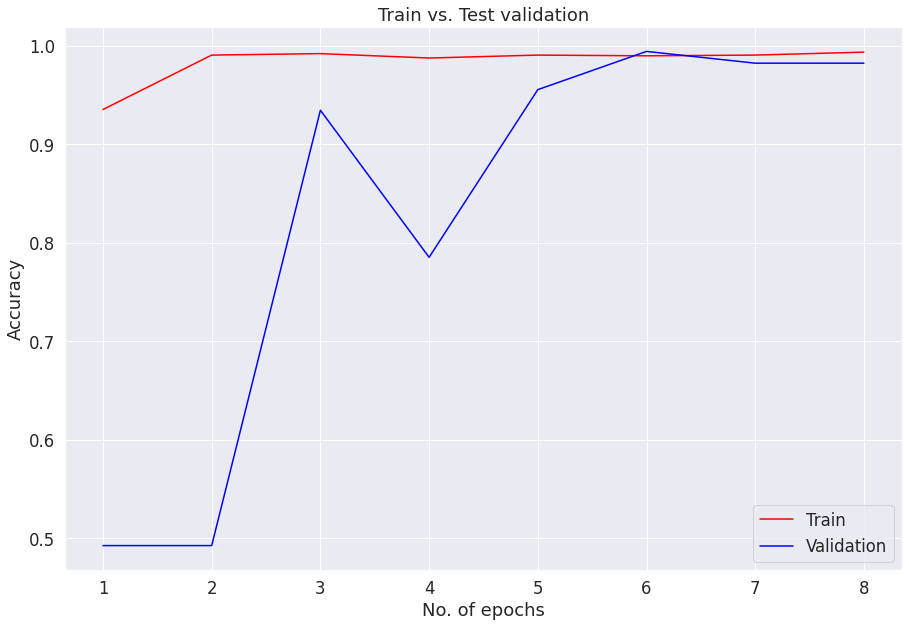

In [36]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(history)

sns.set(font_scale= 1.5)

plt.figure(figsize = (15, 10))
sns.lineplot(epochs_list, df['train_acc'], color = 'red', label = 'Train')
sns.lineplot(epochs_list, df['test_acc'], color = 'blue', label = 'Validation').set(xlabel = "No. of epochs", ylabel = "Accuracy", title ='Train vs. Test validation')

[Text(0.5, 0, 'Epochs')]

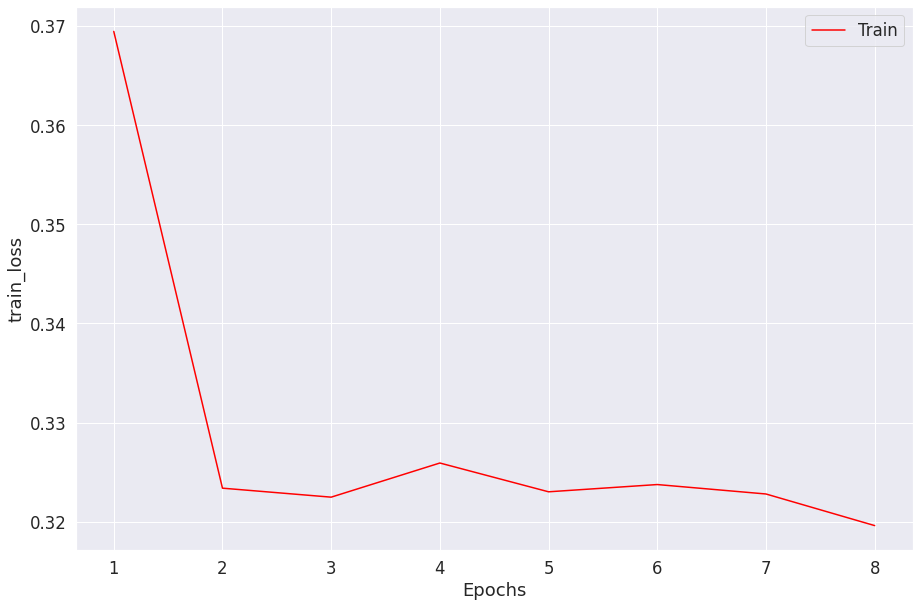

In [37]:
# train loss representation
plt.figure(figsize = (15, 10))
sns.lineplot(epochs_list, df['train_loss'], color='red', label = 'Train').set(xlabel = 'Epochs')

In [38]:
y_test = np.array([])
for i, (images,label) in enumerate(test_dataset):
    labls = label.numpy()
    y_test = np.append(y_test, labls)

In [39]:
preds = best_preds.to(torch.int64)
y_actual = y_test.astype('int64')
preds = preds.to("cpu")

In [40]:
# confusin matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_actual, preds.numpy())
print(conf_mat)

[[169   1]
 [  1 164]]


[Text(0.5, 76.5, 'Predictons'), Text(76.5, 0.5, 'Actuals')]

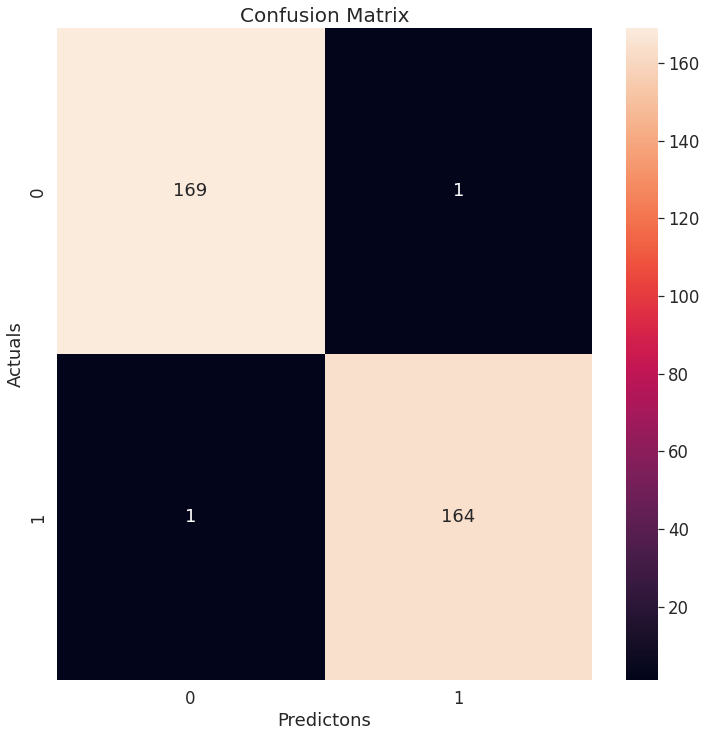

In [41]:
# heatmap representation of Confusion matrix
plt.figure(figsize = (12,12))
import seaborn as sns
plt.title('Confusion Matrix', fontsize=20)
sns.heatmap(conf_mat, annot = True, fmt = '').set(xlabel = "Predictons", ylabel = "Actuals")